## 1. Given a undirected graph 

A graph has 8 nodes: {0,1,2,3,4,5,6,7} and the edge list: (0, 1), (0, 2), (0, 7), (1, 2), (1, 3), (2, 3), (3, 4), (4, 5), (4, 6), (5, 6), (6, 7), (7, 8), (8, 9), (9, 10), (10, 11).

Question 1. Caculate the The modularity of a graph with three partition: [{1, 2, 3},{4, 5, 6},{0, 7}]

Question 2. Find maximum clique in the graph.

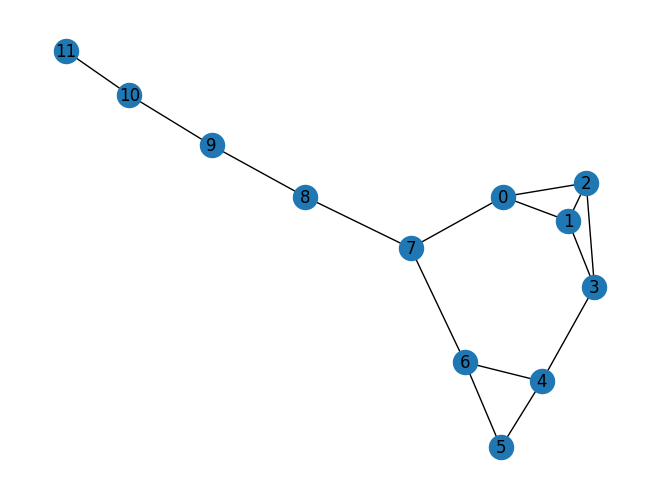

In [1]:
import networkx as nx
G = nx.Graph()


G.add_edges_from([(0, 1), (0, 2), (0, 7), (1, 2), (1, 3), (2, 3), (3, 4), (4, 5), (4, 6), (5, 6), (6, 7), (7, 8), (8, 9), (9, 10), (10, 11)])

nx.draw(G, with_labels=True)

In [7]:
partition = [
    {1, 2, 4},
    {5, 6, 7},
    {0, 7}
]

In [3]:
def modularity(G, partition):
    W = sum(G.edges[v, w].get('weight', 1) for v, w in G.edges)
    summation = 0
    for cluster_nodes in partition:
        s_c = sum(G.degree(n, weight='weight') for n in cluster_nodes)
        # Use subgraph to count only internal links
        C = G.subgraph(cluster_nodes)
        W_c = sum(C.edges[v, w].get('weight', 1) for v, w in C.edges)
        summation += W_c - s_c ** 2 / (4 * W)
    
    return summation / W

In [8]:
modularity(G, partition)


0.06555555555555555

In [9]:
cliques = list(nx.find_cliques(G))

# Find maximum clique
max_clique = max(cliques, key=len)
max_clique

[0, 1, 2]

### 2. Read the Edge list file "football.gml", using the info file "football.txt".
To extract info, you need to import zipfile from Python and use networkX parse_gml to parse gml data into networkX.

Question 1. Compute communities using Louvain algorithm

Question 2. Visualize the communities

Question 3. Visualize the subgraphs for the communities. 

The file football.gml contains the network of American football games
between Division IA colleges during regular season Fall 2000, as compiled
by M. Girvan and M. Newman.  The nodes have values that indicate to which
conferences they belong.  The values are as follows:

  0 = Atlantic Coast
  1 = Big East
  2 = Big Ten
  3 = Big Twelve
  4 = Conference USA
  5 = Independents
  6 = Mid-American
  7 = Mountain West
  8 = Pacific Ten
  9 = Southeastern
 10 = Sun Belt
 11 = Western Athletic

If you make use of these data, please cite M. Girvan and M. E. J. Newman,
Community structure in social and biological networks,
Proc. Natl. Acad. Sci. USA 99, 7821-7826 (2002).

Correction: Two edges were erroneously duplicated in this data set, and
have been removed (21 SEP 2014)

BrighamYoung         12
FloridaState         12
Iowa                 12
KansasState          12
NewMexico            11
TexasTech            12
PennState            12
SouthernCalifornia   12
ArizonaState         11
SanDie

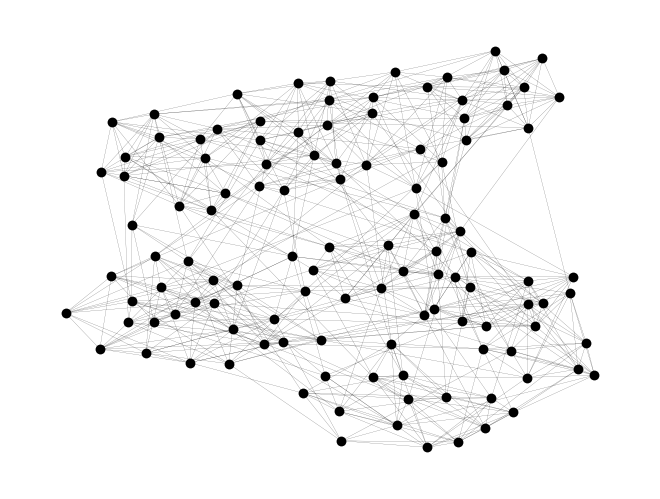

In [77]:
import zipfile
import matplotlib.pyplot as plt
import networkx as nx

zf = zipfile.ZipFile(s)  # zipfile object
txt = zf.read("football.txt").decode()  # read info file
gml = zf.read("football.gml").decode()  # read gml data
# throw away bogus first line with # from mejn files
gml = gml.split("\n")[1:]
G = nx.parse_gml(gml)  # parse gml data

print(txt)
# print degree for each team - number of games
for n, d in G.degree():
    print(f"{n:20} {d:2}")

options = {"node_color": "black", "node_size": 50, "linewidths": 0, "width": 0.1}

pos = nx.spring_layout(G, seed=1969)  # Seed for reproducible layout
nx.draw(G, pos, **options)
plt.show()

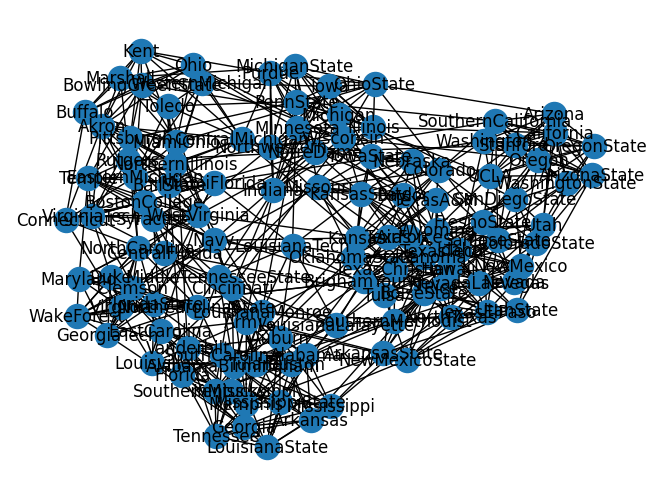

In [11]:
nx.draw(G,with_labels = True)

In [12]:
# Import libraries
import community.community_louvain as community_louvain
import networkx.algorithms.community as nx_comm


In [23]:
# Construct node colours for each community
def create_community_node_colors(graph, communities):
    number_of_colors = len(communities[0])
    colors = ["#EF9A9A", "#BA68C8", "#64B5F6", "#81C784",
              "#FFF176", "#BDBDBD","#e8eb6a","#9c1e22","#c491eb"][:number_of_colors]
    node_colors = []
    
    # iterate each node in the graph and find which community it belongs to
    # if the current node is found at a specific community, add color to the 
    # node_colors list
    for node in graph:
        current_community_index = 0
        for community in communities:
            if node in community:
                node_colors.append(colors[current_community_index])
                break
            current_community_index += 1
    return node_colors

In [14]:
# convert the python-louvain package output to 
# NetworkX package community function output format
def get_louvain_communities(graph, random_state=1):
    louvain_partition_dict = community_louvain.best_partition(graph, random_state=random_state)
    unique_partition_labels = list(set(louvain_partition_dict.values()))
    communities = [[] for i in range(len(unique_partition_labels))]
    for node in louvain_partition_dict.keys():
        communities[louvain_partition_dict[node]].append(node)
    return communities

In [16]:
# get communities using louvain algorithm
louvain_communities = get_louvain_communities(G, random_state=1)
louvain_communities

[['BrighamYoung',
  'NewMexico',
  'SouthernCalifornia',
  'ArizonaState',
  'SanDiegoState',
  'NorthTexas',
  'Wyoming',
  'UCLA',
  'Arizona',
  'Utah',
  'ArkansasState',
  'BoiseState',
  'ColoradoState',
  'Idaho',
  'Washington',
  'Oregon',
  'NewMexicoState',
  'Stanford',
  'WashingtonState',
  'UtahState',
  'AirForce',
  'NevadaLasVegas',
  'OregonState',
  'California'],
 ['FloridaState',
  'NorthCarolinaState',
  'Virginia',
  'GeorgiaTech',
  'Duke',
  'NorthCarolina',
  'Clemson',
  'WakeForest',
  'Maryland'],
 ['Iowa',
  'PennState',
  'Northwestern',
  'Wisconsin',
  'Michigan',
  'Purdue',
  'OhioState',
  'Minnesota',
  'Illinois',
  'MichiganState',
  'Indiana'],
 ['KansasState',
  'TexasTech',
  'Baylor',
  'Colorado',
  'Kansas',
  'IowaState',
  'Nebraska',
  'TexasA&M',
  'Oklahoma',
  'Texas',
  'Missouri',
  'OklahomaState'],
 ['VirginiaTech',
  'BostonCollege',
  'WestVirginia',
  'Syracuse',
  'Pittsburgh',
  'Temple',
  'Navy',
  'NotreDame',
  'Rutgers',

In [19]:
# Visualize communities
def visualize_communities(graph, communities):
    # create visualization
    node_colors = create_community_node_colors(graph, communities)
    modularity = round(nx_comm.modularity(graph, communities), 10)
    title = f"Community Visualization of {len(communities)} communities with modularity of {modularity}"
    pos = nx.spring_layout(graph, 
                           k=0.3, iterations=50,
                           seed=2)

    plt.figure(1,figsize=(10,6)) 
    nx.draw(graph,
            pos = pos,
            node_size=1000,
            node_color=node_colors,
            with_labels=True,
            font_size = 20,
            font_color='black')
    plt.title(title)
    plt.show() 

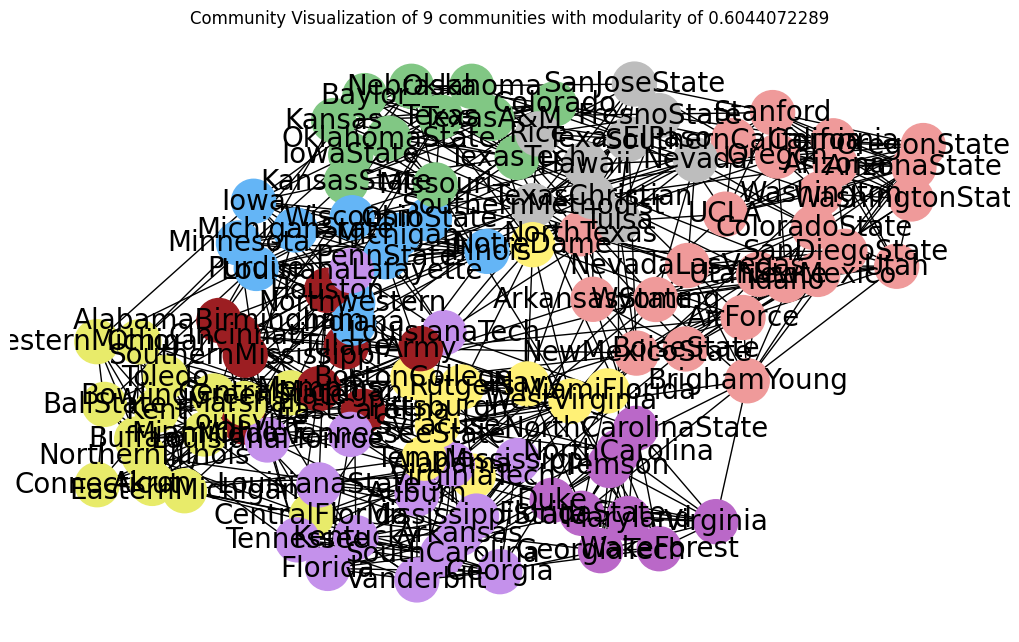

In [24]:
import matplotlib.pyplot as plt
visualize_communities(G, louvain_communities)


In [25]:
# visualizing all subgraphs
def visualize_subgraph(graph, subgraph_nodes, node_color):
    # get subgraph
    subgraph = nx.subgraph(graph, subgraph_nodes)

    # create visualization
    node_colors = [node_color] * len(subgraph_nodes)
    title = f"Community Partition Subgraph"
    pos = nx.spring_layout(subgraph, 
                           k=0.3, iterations=50,
                           seed=2)

    plt.figure(1,figsize=(8,6)) 
    nx.draw(subgraph,
            pos = pos,
            node_size=1000,
            node_color=node_colors,
            with_labels=True,
            font_size = 20,
            font_color='black')
    plt.title(title)
    plt.show() 

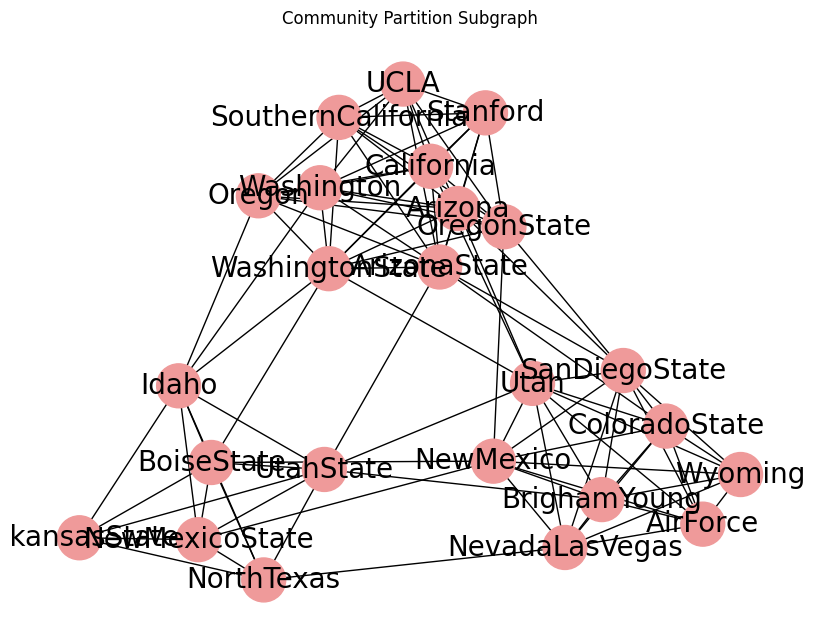

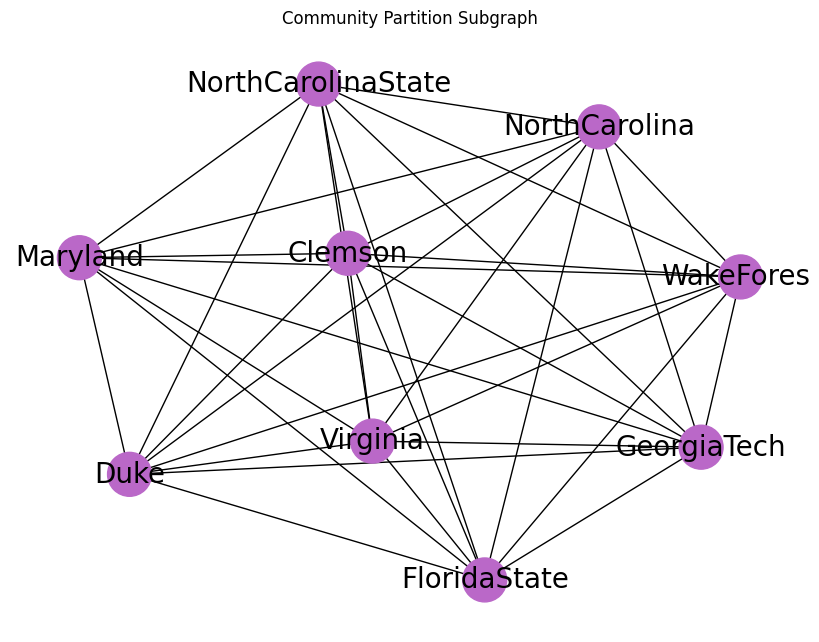

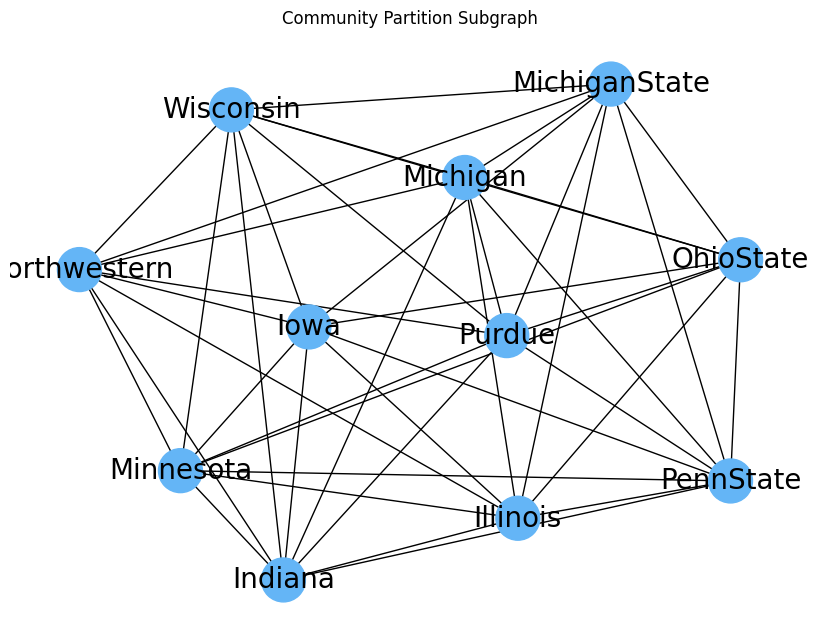

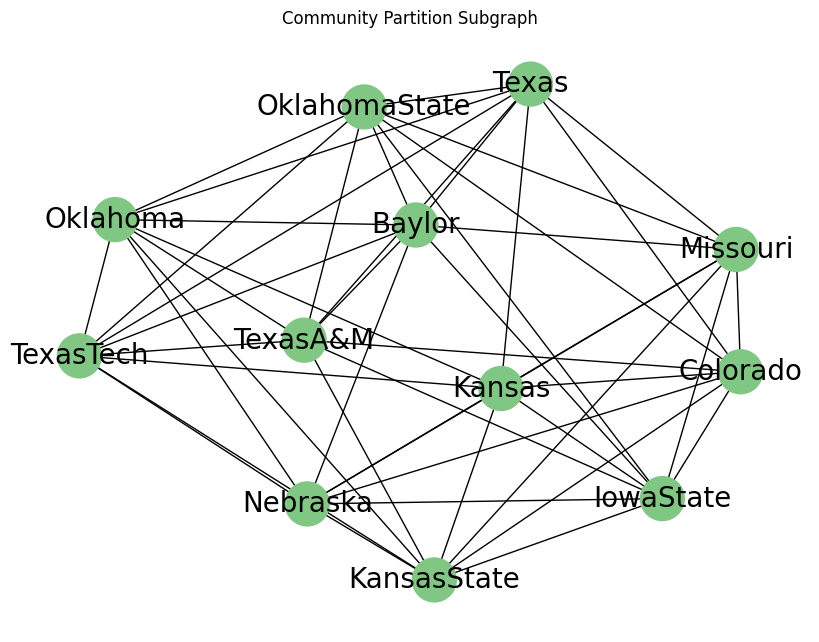

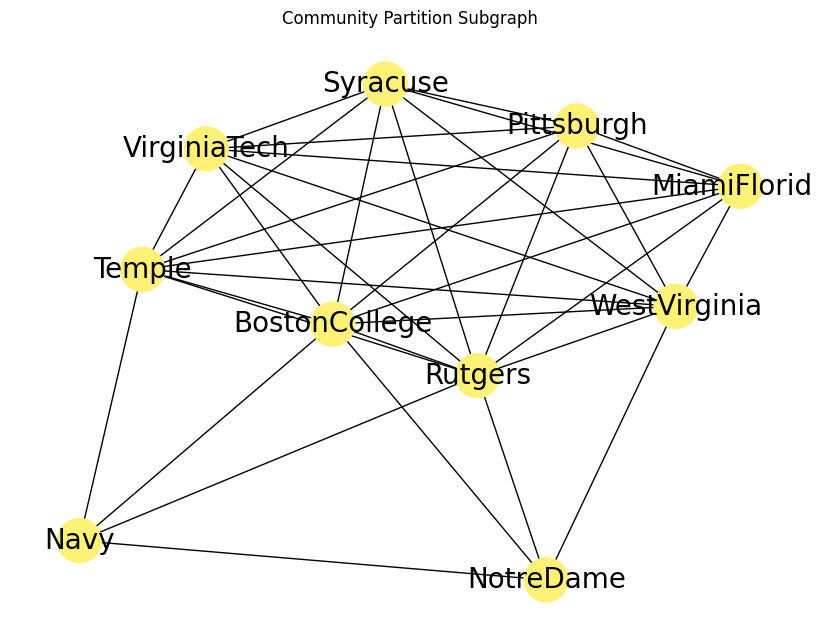

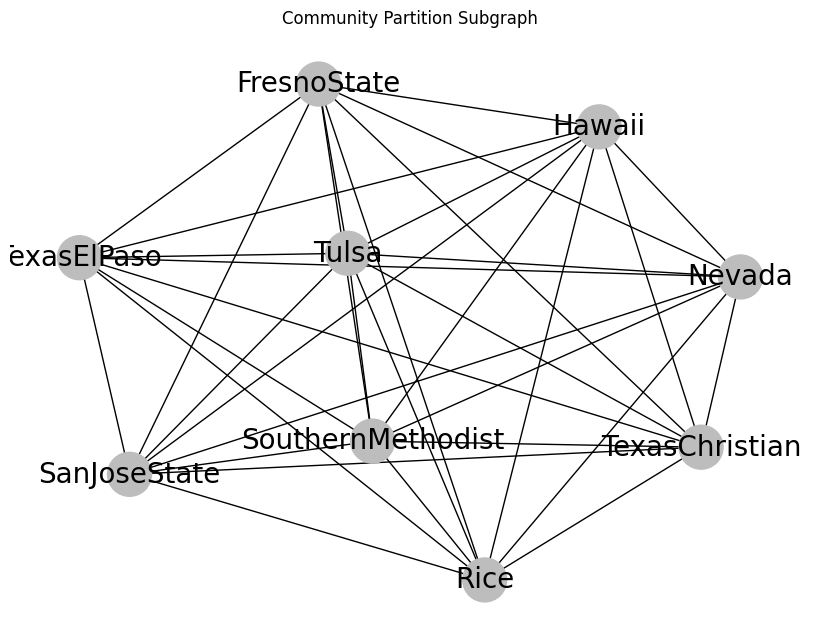

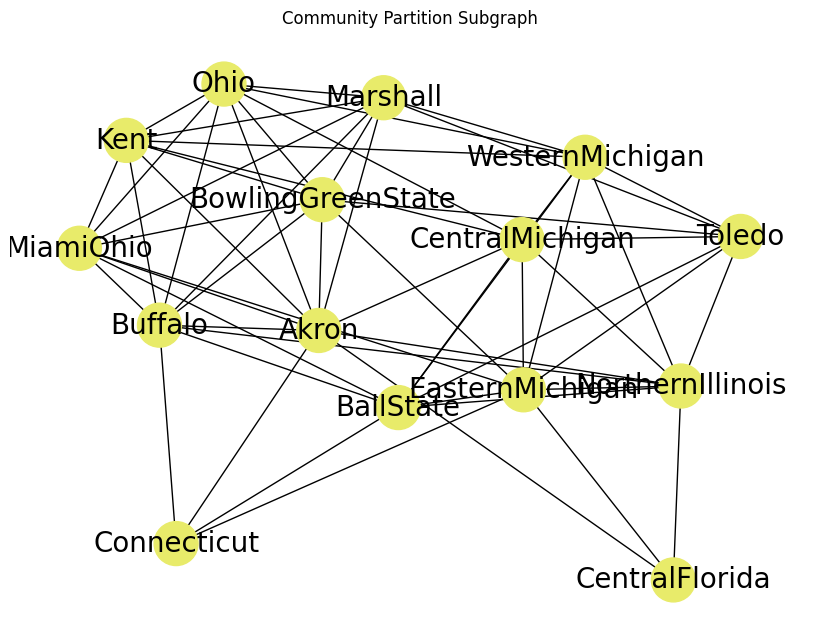

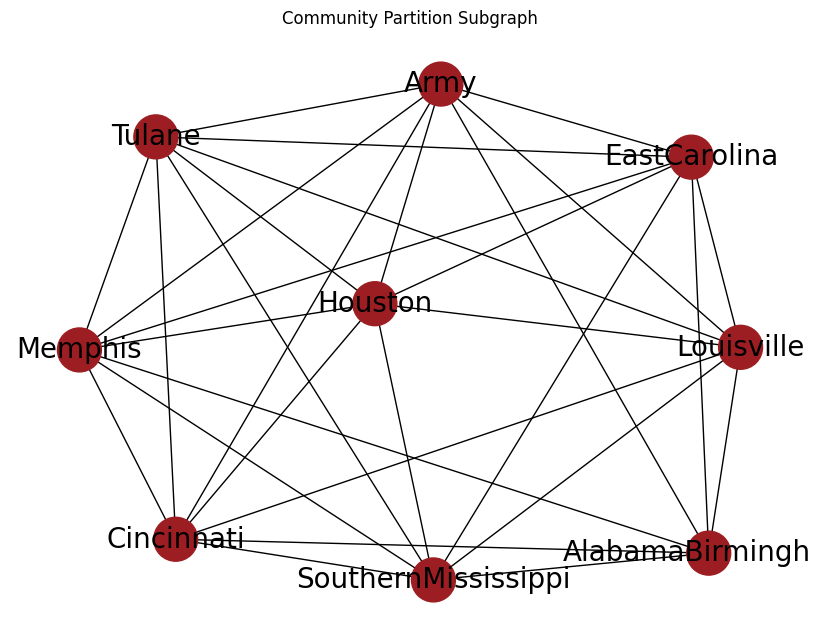

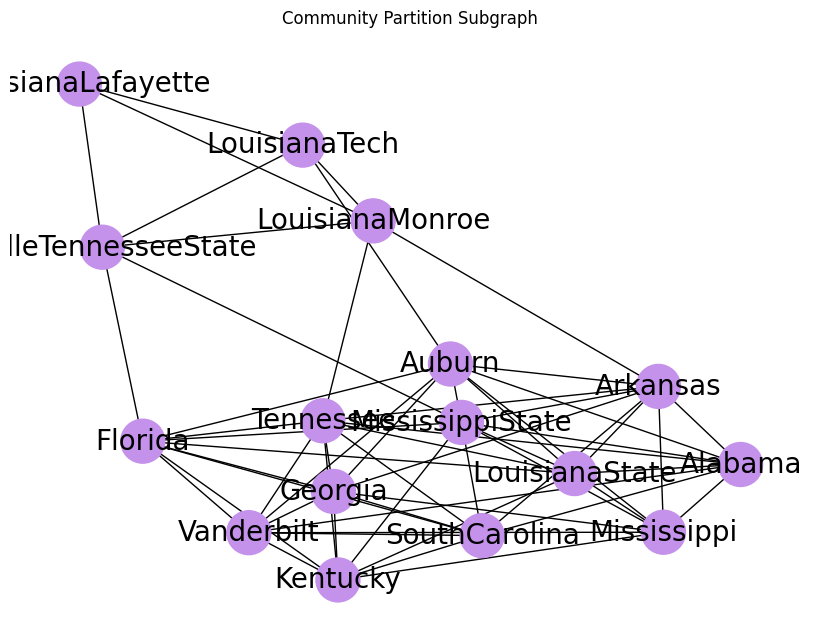

In [26]:
# Colouring each subgraph with a individual colour
colors = ["#EF9A9A", "#BA68C8", "#64B5F6", "#81C784","#FFF176", "#BDBDBD","#e8eb6a","#9c1e22","#c491eb"]
for i in range(len(louvain_communities)):
    visualize_subgraph(G, louvain_communities[i], colors[i])

## 3. Read edge list file named: karate_edgelist.txt

Question 1. Compute the local clustering coefficient.

Question 2. Find all the nodes, which all neighbors of that node form a complete graph (fully connected to that node).

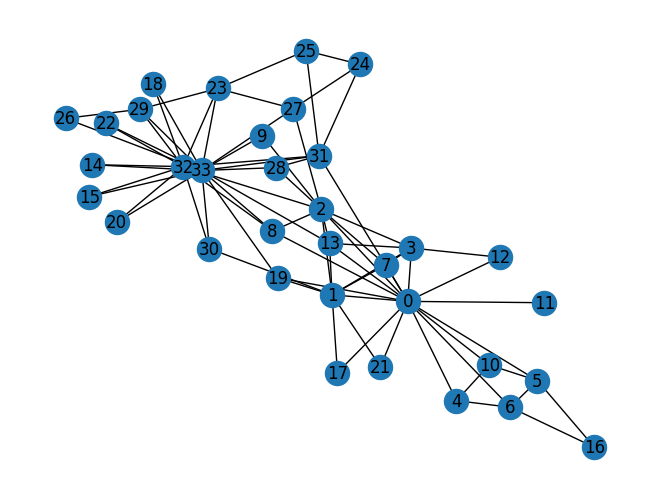

In [69]:
karate_graph = nx.read_edgelist('Karate_edgelist.txt', nodetype = int)
nx.draw(karate_graph,with_labels = True)

In [61]:
from collections import Counter
from itertools import chain, combinations

# Calculate degree of a node
def degree_(G, nodes=None):
    if nodes is None:
        nodes_nbrs = G.adj.items()
    else:
        nodes_nbrs = ((n, G[n]) for n in G.nbunch_iter(nodes))

    for v, v_nbrs in nodes_nbrs:
        vs = set(v_nbrs) - {v}
        gen_degree = Counter(len(vs & (set(G[w]) - {w})) for w in vs)
        ntriangles = sum(k * val for k, val in gen_degree.items())
        yield (v, len(vs), ntriangles, gen_degree)

In [63]:
# Compute the local clustering coefficient for nodes where the input graph is from networkx.
def local_clustering(G, nodes=None):
    td_iter = degree_(G, nodes)
    clusterc = {v: 0 if t == 0 else t / (d * (d - 1)) for v, d, t, _ in td_iter}
    if nodes in G:
        # Return the value of the sole entry in the dictionary.
        return clusterc[nodes]
    return clusterc

In [76]:
# Find the fully completed graph
for i in range(len(karate_graph)):
    if local_clustering(karate_graph, nodes = i) == 1:
        print("node",i+1)

node 8
node 13
node 15
node 16
node 17
node 18
node 19
node 21
node 22
node 23
node 27
